In [43]:

!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [45]:
## confirming file order 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##maybe
# import sklearn.preprocessing import Standard

In [ ]:
# sanity check
df = pd.read_csv('aggregate_rating_of_story.csv')


In [7]:
df.head()

,story,story_id,aditya_empathy_human,aditya_surprise_human,aditya_engagement_human,aditya_complexity_human,aditya_coherence_human,aditya_fluency_human,empathy_llama3.1,surprise_llama3.1,...,kole_engagement_human,kole_complexity_human,kole_coherence_human,kole_fluency_human,dev_empathy_human,dev_surprise_human,dev_engagement_human,dev_complexity_human,dev_coherence_human,dev_fluency_human
0,"Noah, a self-proclaimed 'king of the playgroun...",Story_1,3,1,3,4,3,4,4,5,...,3,4,3,4,3.0,3.5,3.5,4.0,3.0,4
1,Henry's eyes gazed out the window as the sound...,Story_2,4,3,2,3,4,4,5,4,...,3,3,3,4,3.5,3.5,4.0,3.5,4.0,4
2,Granny Clara Jenkins adjusted her shades and w...,Story_3,2,3,2,3,3,4,5,4,...,3,3,3,4,3.5,3.0,4.0,3.0,3.5,4
3,Henry puffed on his pipe as he sat behind the ...,Story_4,2,3,4,2,3,5,4,5,...,4,3,4,4,4.0,3.5,4.0,3.0,4.0,4
4,The lights of Manhattan's concrete jungle cast...,Story_5,2,4,2,3,3,4,3,5,...,2,3,3,4,3.0,4.0,3.5,3.5,3.0,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   story                    25 non-null     object 
 1   story_id                 25 non-null     object 
 2   aditya_empathy_human     25 non-null     int64  
 3   aditya_surprise_human    25 non-null     int64  
 4   aditya_engagement_human  25 non-null     int64  
 5   aditya_complexity_human  25 non-null     int64  
 6   aditya_coherence_human   25 non-null     int64  
 7   aditya_fluency_human     25 non-null     int64  
 8   empathy_llama3.1         25 non-null     int64  
 9   surprise_llama3.1        25 non-null     int64  
 10  engagement_llama3.1      25 non-null     int64  
 11  complexity_llama3.1      25 non-null     int64  
 12  coherence_llama3.1       25 non-null     int64  
 13  fluency_llama3.1         25 non-null     int64  
 14  empathy_gpt4o            25 

In [54]:
df[2:].describe

<bound method NDFrame.describe of                                                 story  story_id  \
2   Granny Clara Jenkins adjusted her shades and w...   Story_3   
3   Henry puffed on his pipe as he sat behind the ...   Story_4   
4   The lights of Manhattan's concrete jungle cast...   Story_5   
5   Sofia hopped out of bed and began getting read...   Story_6   
6   In a dimly lit cubicle, Ella's slender fingers...   Story_7   
7   The ocean's tide washed over the weathered roc...   Story_8   
8   In the faded facades of old Azsar, where crumb...   Story_9   
9   Noah scoured the edge of the Mars colony delta...  Story_10   
10  Henry trudged through the dense forest, his wo...  Story_11   
11  Henry emerged from his armchair, rubbing the c...  Story_12   
12  In the gleaming towers of Celestia, Maria Nava...  Story_13   
13  Henry puffed on his pipe, gazing out the villa...  Story_14   
14  Detective Kate Martin stepped into the precinc...  Story_15   
15  Noah rubbed the sleep fr

In [52]:
df.

AttributeError: 'DataFrame' object has no attribute 'col'

In [ ]:
reviewers = ['aditya', 'kole', 'dev']
llm = ['llama3.1', 'gpt4o']
dimensions = ["empathy", "surprise", "engagement", "complexity", "coherence", "fluency"]

In [18]:
aditya_cols = [col for col in df.columns if col.startswith('aditya_')]
kole_cols = [col for col in df.columns if col.startswith('kole_')]
dev_cols = [col for col in df.columns if col.startswith('dev_')]
llama_cols = [col for col in df.columns if col.endswith('llama3.1')]
gpt4o_cols = [col for col in df.columns if col.endswith('gpt4o')]


In [25]:
kole_cols

['kole_empathy_human',
 'kole_surprise_human',
 'kole_engagement_human',
 'kole_complexity_human',
 'kole_coherence_human',
 'kole_fluency_human']

In [20]:
def describe_columns(df, columns, label):
    print(f"\n===== {label.upper()} =====")
    print(df[columns].describe().loc[['mean', 'std', 'min', 'max']])


In [21]:
describe_columns(df, aditya_cols, 'Aditya')
describe_columns(df, kole_cols, 'Kole')
describe_columns(df, dev_cols, 'Dev')
describe_columns(df, llama_cols, 'LLaMA 3.1')
describe_columns(df, gpt4o_cols, 'GPT-4o')



===== ADITYA =====
      aditya_empathy_human  aditya_surprise_human  aditya_engagement_human  \
mean              3.000000               3.040000                 2.920000   
std               0.707107               0.888819                 0.996661   
min               2.000000               1.000000                 1.000000   
max               4.000000               4.000000                 5.000000   

      aditya_complexity_human  aditya_coherence_human  aditya_fluency_human  
mean                 3.280000                2.920000              4.080000  
std                  0.678233                0.702377              0.812404  
min                  2.000000                2.000000              2.000000  
max                  4.000000                4.000000              5.000000  

===== KOLE =====
      kole_empathy_human  kole_surprise_human  kole_engagement_human  \
mean             2.80000               2.8400               2.720000   
std              0.57735             

In [35]:
empathy_cols = ['aditya_empathy_human', 'kole_empathy_human', 'dev_empathy_human', 'empathy_llama3.1', 'empathy_gpt4o']
df_empathy = df[empathy_cols]

In [37]:
df_empathy.describe()

,aditya_empathy_human,kole_empathy_human,dev_empathy_human,empathy_llama3.1,empathy_gpt4o
count,25.000000,25.00000,25.000000,25.000000,25.000000
mean,3.000000,2.80000,3.300000,3.960000,4.160000
std,0.707107,0.57735,0.381881,0.454606,0.553775
min,2.000000,2.00000,3.000000,3.000000,3.000000
25%,3.000000,2.00000,3.000000,4.000000,4.000000
50%,3.000000,3.00000,3.000000,4.000000,4.000000
75%,3.000000,3.00000,3.500000,4.000000,4.000000
max,4.000000,4.00000,4.000000,5.000000,5.000000


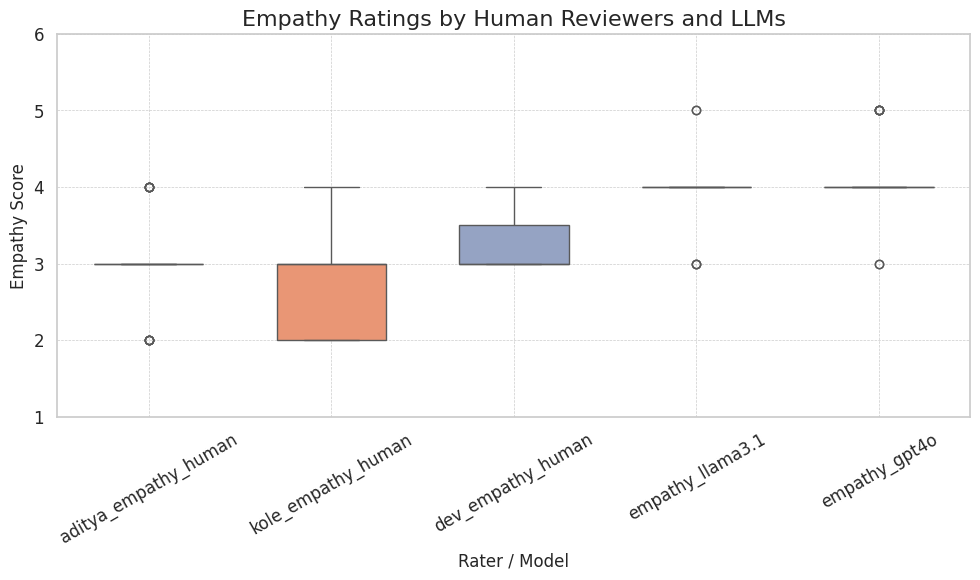

In [61]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.1)

# Create the boxplot using seaborn for better aesthetics
sns.boxplot(data=df_empathy, palette="Set2", width=0.6)

plt.title("Empathy Ratings by Human Reviewers and LLMs", fontsize=16)
plt.ylabel("Empathy Score", fontsize=12)
plt.xlabel("Rater / Model", fontsize=12)
plt.xticks(rotation=30)
plt.ylim(df_empathy.min().min() - 1, df_empathy.max().max() + 1)
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

###
> both llama3.1 and gpt40 give consistnenlty 4.0 expect for some outlier
> variance in models individually is low >> sugggests conservative in the empathy rating patterns, also indicate lack of understanding of nuance or overfitting to empathy "prompt template" >> its not good, more exploration should be done

> Humans vary more: Especially Kole, who uses the lower end of the scale more freely. Also due to higher IQR in kole in lower ranges suggests greater subjectivity or understanding of story context
> In dev, Narrower IQR than Kole but wider than models and Aditya.

In [47]:
df_empathy.corr()


,aditya_empathy_human,kole_empathy_human,dev_empathy_human,empathy_llama3.1,empathy_gpt4o
aditya_empathy_human,1.000000,0.408248,0.154303,0.129619,0.319221
kole_empathy_human,0.408248,1.000000,0.377964,-0.031750,-0.026064
dev_empathy_human,0.154303,0.377964,1.000000,0.192006,-0.039406
empathy_llama3.1,0.129619,-0.031750,0.192006,1.000000,0.523007
empathy_gpt4o,0.319221,-0.026064,-0.039406,0.523007,1.000000


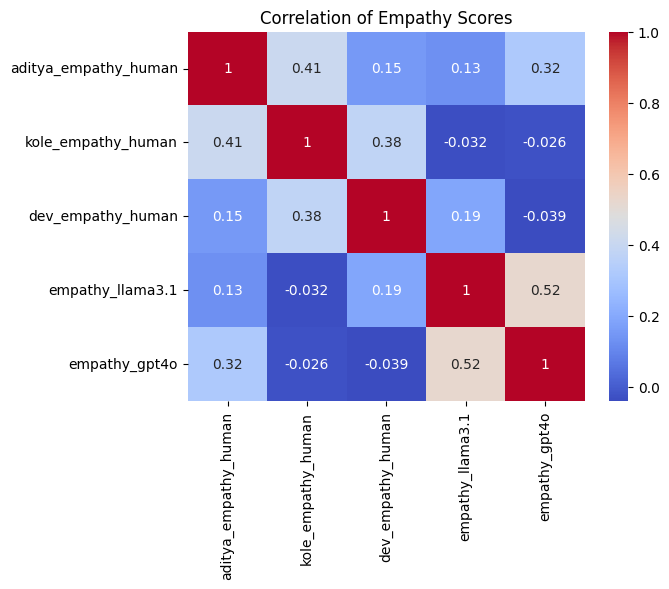

In [48]:


sns.heatmap(df_empathy.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Empathy Scores")
plt.show()


## the highest conformal value is 0.52, atleast model are agreeing with eachother

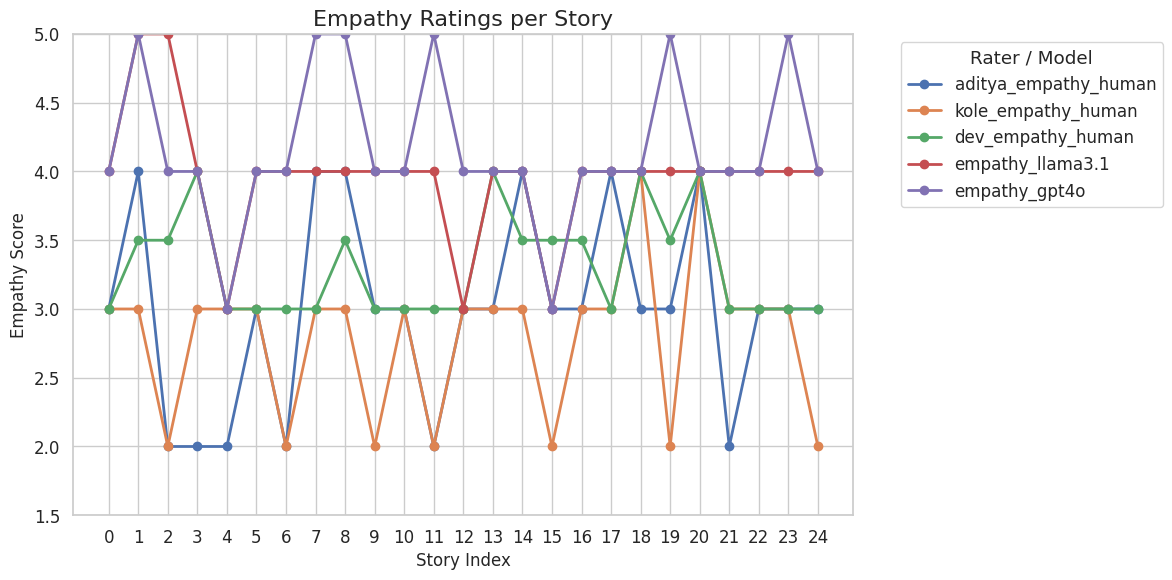

In [60]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", font_scale=1.1)

for col in df_empathy.columns:
    plt.plot(df_empathy.index, df_empathy[col], marker='o', label=col, linewidth=2)

plt.title("Empathy Ratings per Story", fontsize=16)
plt.xlabel("Story Index", fontsize=12)
plt.ylabel("Empathy Score", fontsize=12)
plt.xticks(df_empathy.index)
plt.ylim(df_empathy.min().min() - 0.5, df_empathy.max().max())
plt.legend(title="Rater / Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## all dims

In [ ]:


for dim in dimensions:
    cols = [
        f'aditya_{dim}_human',
        f'kole_{dim}_human',
        f'dev_{dim}_human',
        f'{dim}_llama3.1',
        f'{dim}_gpt4o'
    ]
    
    corr_matrix = df[cols].corr()
    print(f"\n=== Correlation Matrix for {dim.upper()} ===")
    print(corr_matrix.round(2))



=== Correlation Matrix for EMPATHY ===
                      aditya_empathy_human  kole_empathy_human  \
aditya_empathy_human                  1.00                0.41   
kole_empathy_human                    0.41                1.00   
dev_empathy_human                     0.15                0.38   
empathy_llama3.1                      0.13               -0.03   
empathy_gpt4o                         0.32               -0.03   

                      dev_empathy_human  empathy_llama3.1  empathy_gpt4o  
aditya_empathy_human               0.15              0.13           0.32  
kole_empathy_human                 0.38             -0.03          -0.03  
dev_empathy_human                  1.00              0.19          -0.04  
empathy_llama3.1                   0.19              1.00           0.52  
empathy_gpt4o                     -0.04              0.52           1.00  

=== Correlation Matrix for SURPRISE ===
                       aditya_surprise_human  kole_surprise_human  \
adi

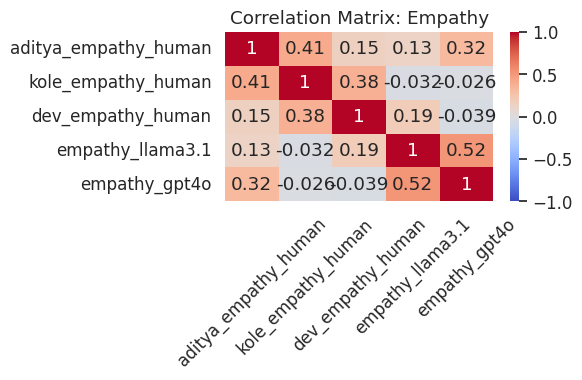

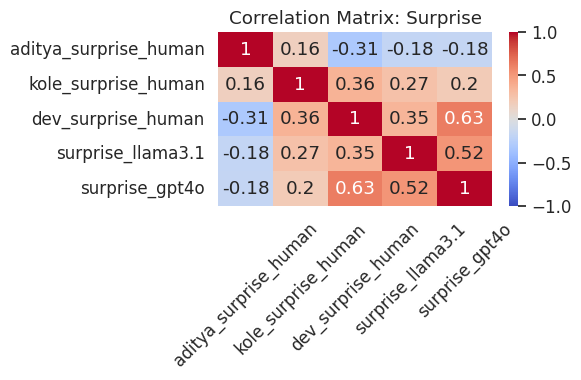

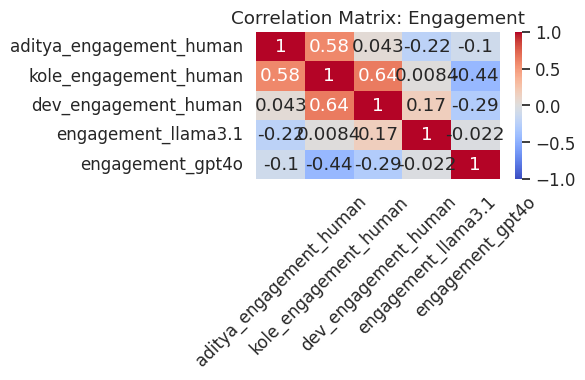

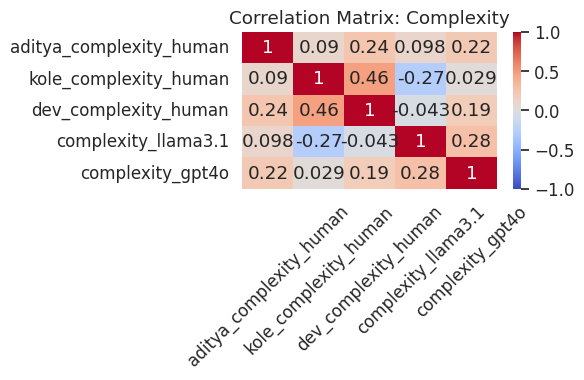

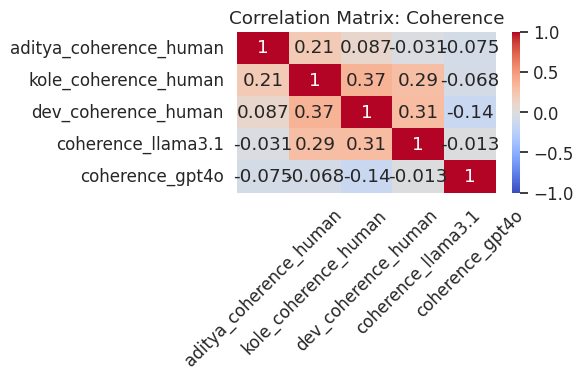

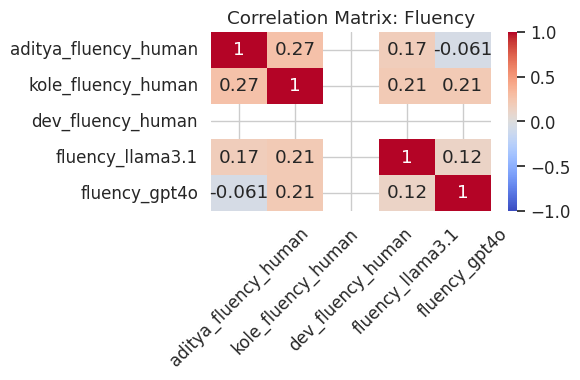

In [ ]:

for dim in dimensions:
    cols = [
        f'aditya_{dim}_human',
        f'kole_{dim}_human',
        f'dev_{dim}_human',
        f'{dim}_llama3.1',
        f'{dim}_gpt4o'
    ]
    plt.figure(figsize=(6, 4))
    sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix: {dim.capitalize()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
